**Import packages**

In [32]:
!pip install pytictoc

In [33]:
!pip install tensorflow

In [34]:
import random
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import warnings
from pytictoc import TicToc
warnings.filterwarnings( "ignore" )

**Load the dataset**

In [35]:
(X_train, y_train), (X_test,y_test) = datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**Normalize the input data**

In [36]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Set directory to saved models**

In [37]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd /content/gdrive/MyDrive/ECE 696B/Project - ECE696B
# # %cd /content/gdrive/MyDrive/Colab Notebooks

In [38]:
%cd C:\Users\nh202\My Drive (nh202@arizona.edu)\ECE 696B\Project - ECE696B

C:\Users\nh202\My Drive (nh202@arizona.edu)\ECE 696B\Project - ECE696B


In [39]:
from keras.models import load_model
CNN_MNIST_base = load_model('CNN_MNIST.h5')
CNN_MNIST_GNA_trained = load_model('CNN_MNIST_GNA_trained.h5')
CNN_MNIST_FGSM_trained = load_model('CNN_MNIST_FGSM_trained.h5')
CNN_MNIST_CW_trained = load_model('CNN_MNIST_CW_trained.h5')

# Evaluate performance of CNN models

**Performance on GNA adversarial examples**

In [40]:
%cd C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\GNA

C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\GNA


In [41]:
indexes = range(1000)
sigmas = np.arange(0,1.1,0.1)
stored_results = []
for i in sigmas:
  print(f'Sigma value: {np.round(i,1)}')
  stored_results.append(i)
    
  filename = 'MNIST_X_test_noisy_GNA_sigma' + str(np.round(i,1)) + '.npy'
  X_test_noisy = np.load(filename)
  
  avg_l2_norm = np.mean(np.sqrt(np.sum((X_test_noisy-X_test[indexes])**2, axis=(1,2))))
  stored_results.append(avg_l2_norm)
  print("Average l2 distance of the perturbation:", avg_l2_norm)

  print('\nTest accuracy on perturbed data')
  _,accuracy = CNN_MNIST_base.evaluate(X_test_noisy,y_test[indexes])
  stored_results.append(accuracy)

  _,accuracy = CNN_MNIST_GNA_trained.evaluate(X_test_noisy,y_test[indexes])
  stored_results.append(accuracy)

  _,accuracy = CNN_MNIST_FGSM_trained.evaluate(X_test_noisy,y_test[indexes])
  stored_results.append(accuracy)

  _,accuracy = CNN_MNIST_CW_trained.evaluate(X_test_noisy,y_test[indexes])
  stored_results.append(accuracy)

  print('\n')

Sigma value: 0.0
Average l2 distance of the perturbation: 0.0

Test accuracy on perturbed data
32/32 [==============================] - 1s 6ms/step - loss: 0.0901 - accuracy: 0.9720


Sigma value: 0.1
Average l2 distance of the perturbation: 2.066130566536646

Test accuracy on perturbed data
32/32 [==============================] - 0s 9ms/step - loss: 2.2995 - accuracy: 0.1260


Sigma value: 0.2
Average l2 distance of the perturbation: 4.067851809879554

Test accuracy on perturbed data
32/32 [==============================] - 0s 6ms/step - loss: 2.2995 - accuracy: 0.1260


Sigma value: 0.3
Average l2 distance of the perturbation: 6.0360986091056335

Test accuracy on perturbed data
32/32 [==============================] - 0s 4ms/step - loss: 2.2995 - accuracy: 0.1260


Sigma value: 0.4
Average l2 distance of the perturbation: 7.875701370291492

Test accuracy on perturbed data
32/32 [==============================] - 0s 10ms/step - loss: 2.2995 - accuracy: 0.1260


Sigma value: 0.5
Avera

In [42]:
stored_results = np.array(stored_results)
stored_results = stored_results.reshape(-1,6)
df = pd.DataFrame(stored_results, columns = ['sigma','avg_l2_norm','CNN_MNIST_base',\
                                 'CNN_MNIST_GNA_trained','CNN_MNIST_FGSM_trained','CNN_MNIST_CW_trained'])
df.to_csv('Performance of adversarially trained CNN models on GNA [MNIST].csv', index=False)
df

,sigma,avg_l2_norm,CNN_MNIST_base,CNN_MNIST_GNA_trained,CNN_MNIST_FGSM_trained,CNN_MNIST_CW_trained
0,0.0,0.000000,0.979,0.980,0.979,0.972
1,0.1,2.066131,0.968,0.978,0.967,0.126
2,0.2,4.067852,0.832,0.969,0.829,0.126
3,0.3,6.036099,0.555,0.947,0.631,0.126
4,0.4,7.875701,0.386,0.855,0.414,0.126
5,0.5,9.512929,0.302,0.727,0.281,0.126
6,0.6,10.834168,0.257,0.543,0.246,0.126
7,0.7,11.929506,0.246,0.453,0.200,0.126
8,0.8,12.802479,0.214,0.381,0.178,0.126
9,0.9,13.493691,0.190,0.314,0.152,0.126


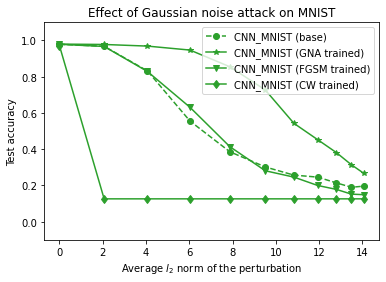

In [43]:
df = pd.read_csv('Performance of adversarially trained CNN models on GNA [MNIST].csv')
plt.plot(df['avg_l2_norm'],df['CNN_MNIST_base'],'o--', color = 'C2')
plt.plot(df['avg_l2_norm'],df['CNN_MNIST_GNA_trained'],'*-', color = 'C2')
plt.plot(df['avg_l2_norm'],df['CNN_MNIST_FGSM_trained'],'v-', color = 'C2')
plt.plot(df['avg_l2_norm'],df['CNN_MNIST_CW_trained'],'d-', color = 'C2')


plt.xlabel('Average $l_2$ norm of the perturbation')
plt.ylabel('Test accuracy')
plt.ylim([-0.1, 1.1])
plt.legend(['CNN_MNIST (base)', 'CNN_MNIST (GNA trained)',\
            'CNN_MNIST (FGSM trained)', 'CNN_MNIST (CW trained)'])
plt.title('Effect of Gaussian noise attack on MNIST')
plt.savefig('Adversarially trained CNN models GNA on MNIST [l2 norm]', dpi=600)
plt.show()

**Performance on FGSM adversarial examples**

In [44]:
%cd C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\FGSM

C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\FGSM


In [45]:
indexes = range(1000)
stored_results = []
for eps in np.arange(0.1,1.1,0.1):
    
  print(f'eps value: {np.round(eps,1)}')
  stored_results.append(eps)

  np_array_filename = 'MNIST_FGSM_'+ str(len(indexes)) +'_adv_examples_eps_'+ str(round(eps,1)) + '.npz'
  data = np.load(np_array_filename)

  # access the arrays using their keys
  X_test_FGSM_CNN = data['X_test_FGSM_CNN']

  avg_l2_norm_CNN = np.mean(np.sqrt(np.sum((X_test_FGSM_CNN-X_test[:len(indexes)])**2, axis=(1,2))))
  stored_results.append(avg_l2_norm_CNN)
    
  _,accuracy = CNN_MNIST_base.evaluate(X_test_FGSM_CNN[indexes],y_test[indexes])
  stored_results.append(accuracy)

  _,accuracy = CNN_MNIST_GNA_trained.evaluate(X_test_FGSM_CNN[indexes],y_test[indexes])
  stored_results.append(accuracy)

  _,accuracy = CNN_MNIST_FGSM_trained.evaluate(X_test_FGSM_CNN[indexes],y_test[indexes])
  stored_results.append(accuracy)

  _,accuracy = CNN_MNIST_CW_trained.evaluate(X_test_FGSM_CNN[indexes],y_test[indexes])
  stored_results.append(accuracy)
    

eps value: 0.1
32/32 [==============================] - 0s 4ms/step - loss: 2.2995 - accuracy: 0.1260
eps value: 0.2
32/32 [==============================] - 0s 4ms/step - loss: 2.2995 - accuracy: 0.1260
eps value: 0.3
32/32 [==============================] - 0s 5ms/step - loss: 2.2995 - accuracy: 0.1260
eps value: 0.4
32/32 [==============================] - 0s 4ms/step - loss: 2.2995 - accuracy: 0.1260
eps value: 0.5
32/32 [==============================] - 0s 4ms/step - loss: 2.2995 - accuracy: 0.1260
eps value: 0.6
32/32 [==============================] - 0s 6ms/step - loss: 2.2995 - accuracy: 0.1260
eps value: 0.7
32/32 [==============================] - 0s 6ms/step - loss: 2.2995 - accuracy: 0.1260
eps value: 0.8
32/32 [==============================] - 0s 6ms/step - loss: 2.2995 - accuracy: 0.1260
eps value: 0.9
32/32 [==============================] - 0s 6ms/step - loss: 2.2995 - accuracy: 0.1260
eps value: 1.0
32/32 [==============================] - 0s 4ms/step - loss: 2.2995

In [46]:
stored_results = np.array(stored_results)
stored_results = stored_results.reshape(-1,6)
df = pd.DataFrame(stored_results, columns = ['sigma','avg_l2_norm','CNN_MNIST_base',\
                                 'CNN_MNIST_GNA_trained','CNN_MNIST_FGSM_trained','CNN_MNIST_CW_trained'])
df.to_csv('Performance of adversarially trained CNN models on FGSM [MNIST].csv', index=False)
df

,sigma,avg_l2_norm,CNN_MNIST_base,CNN_MNIST_GNA_trained,CNN_MNIST_FGSM_trained,CNN_MNIST_CW_trained
0,0.1,2.139995,0.439,0.663,0.991,0.126
1,0.2,4.248348,0.152,0.169,0.994,0.126
2,0.3,6.331492,0.091,0.060,0.994,0.126
3,0.4,8.392001,0.060,0.031,0.990,0.126
4,0.5,10.429860,0.035,0.022,0.980,0.126
5,0.6,12.439137,0.027,0.017,0.970,0.126
6,0.7,14.423671,0.025,0.017,0.961,0.126
7,0.8,16.379772,0.029,0.017,0.947,0.126
8,0.9,18.300023,0.038,0.022,0.938,0.126
9,1.0,20.159997,0.043,0.026,0.935,0.126


Test accuracy on unperturbed data
32/32 [==============================] - 0s 9ms/step - loss: 0.0901 - accuracy: 0.9720


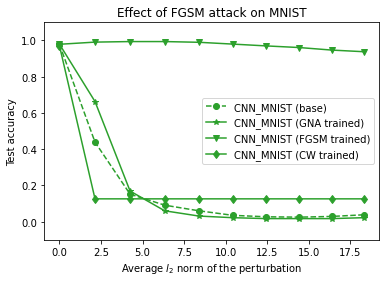

In [47]:
df = pd.read_csv('Performance of adversarially trained CNN models on FGSM [MNIST].csv')

df = df.shift(1)
print('Test accuracy on unperturbed data')
_, accuracy_base = CNN_MNIST_base.evaluate(X_test[indexes],y_test[indexes]);
_, accuracy_GNA_trained = CNN_MNIST_GNA_trained.evaluate(X_test[indexes],y_test[indexes]);
_, accuracy_FGSM_trained = CNN_MNIST_FGSM_trained.evaluate(X_test[indexes],y_test[indexes]);
_, accuracy_CW_trained = CNN_MNIST_CW_trained.evaluate(X_test[indexes],y_test[indexes]);
df.iloc[0] = [0, 0, accuracy_base, accuracy_GNA_trained, accuracy_FGSM_trained, accuracy_CW_trained]

plt.plot(df['avg_l2_norm'],df['CNN_MNIST_base'],'o--', color = 'C2')
plt.plot(df['avg_l2_norm'],df['CNN_MNIST_GNA_trained'],'*-', color = 'C2')
plt.plot(df['avg_l2_norm'],df['CNN_MNIST_FGSM_trained'],'v-', color = 'C2')
plt.plot(df['avg_l2_norm'],df['CNN_MNIST_CW_trained'],'d-', color = 'C2')


plt.xlabel('Average $l_2$ norm of the perturbation')
plt.ylabel('Test accuracy')
plt.ylim([-0.1, 1.1])
plt.legend(['CNN_MNIST (base)', 'CNN_MNIST (GNA trained)',\
            'CNN_MNIST (FGSM trained)', 'CNN_MNIST (CW trained)'])
plt.title('Effect of FGSM attack on MNIST')
plt.savefig('Adversarially trained CNN models FGSM on MNIST [l2 norm]', dpi=600)
plt.show()

**Performance on CW adversarial examples**

In [48]:
%cd C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\CW

C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\CW


In [49]:
indexes = range(1000)
stored_results = []
lot = 0
for c in np.arange(0.1,1.1,0.1):
    filename = 'MNIST_x_adv_stack_CNN_Lot' + str(lot+1) + '_c' + str(np.round(c,1)) + '.npy'
    x_adv_stack = np.load(filename)
    
    stored_results.append(np.round(c,1))
    
    avg_l2_norm = np.mean(np.sqrt(np.sum((x_adv_stack-X_test[:len(x_adv_stack)])**2, axis=(1,2))))    
    
    if np.isnan(avg_l2_norm):
        delta = x_adv_stack-X_test[:len(x_adv_stack)]
        indices = np.argwhere(np.isnan(delta))
        delta[indices] = 1
        x_adv_stack = X_test[:len(x_adv_stack)] + delta
        x_adv_stack = np.clip(x_adv_stack, 0, 1)
        delta = x_adv_stack-X_test[:len(x_adv_stack)]
        avg_l2_norm = np.mean(np.sqrt(np.sum((x_adv_stack-X_test[:len(x_adv_stack)])**2, axis=(1,2))))
        
    stored_results.append(avg_l2_norm)
    
    _,accuracy = CNN_MNIST_base.evaluate(x_adv_stack,y_test[indexes])
    stored_results.append(accuracy)

    _,accuracy = CNN_MNIST_GNA_trained.evaluate(x_adv_stack,y_test[indexes])
    stored_results.append(accuracy)

    _,accuracy = CNN_MNIST_FGSM_trained.evaluate(x_adv_stack,y_test[indexes])
    stored_results.append(accuracy)

    _,accuracy = CNN_MNIST_CW_trained.evaluate(x_adv_stack,y_test[indexes])
    stored_results.append(accuracy)

32/32 [==============================] - 0s 6ms/step - loss: 2.2599 - accuracy: 0.1490


In [50]:
stored_results = np.array(stored_results)
stored_results = stored_results.reshape(-1,6)
df = pd.DataFrame(stored_results, columns = ['sigma','avg_l2_norm','CNN_MNIST_base',\
                                 'CNN_MNIST_GNA_trained','CNN_MNIST_FGSM_trained','CNN_MNIST_CW_trained'])
df.to_csv('Performance of adversarially trained CNN models on CW [MNIST].csv', index=False)
df

,sigma,avg_l2_norm,CNN_MNIST_base,CNN_MNIST_GNA_trained,CNN_MNIST_FGSM_trained,CNN_MNIST_CW_trained
0,0.1,5.262308,0.018,0.468,0.530,0.189
1,0.2,7.467623,0.019,0.353,0.447,0.176
2,0.3,7.945407,0.017,0.317,0.418,0.172
3,0.4,8.382603,0.017,0.267,0.377,0.170
4,0.5,9.680635,0.017,0.254,0.359,0.170
5,0.6,9.714402,0.021,0.273,0.414,0.171
6,0.7,9.259683,0.038,0.279,0.433,0.160
7,0.8,8.725523,0.038,0.285,0.386,0.153
8,0.9,7.852937,0.036,0.304,0.394,0.149
9,1.0,7.612374,0.037,0.290,0.359,0.149


Test accuracy on unperturbed data
32/32 [==============================] - 0s 6ms/step - loss: 0.0901 - accuracy: 0.9720


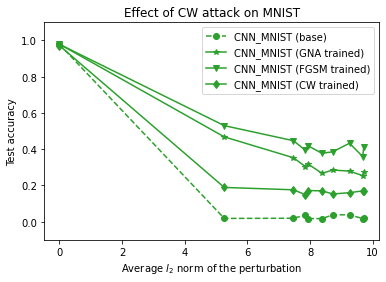

In [51]:
df = pd.read_csv('Performance of adversarially trained CNN models on CW [MNIST].csv')

df = df.shift(1)
print('Test accuracy on unperturbed data')
_, accuracy_base = CNN_MNIST_base.evaluate(X_test[indexes],y_test[indexes]);
_, accuracy_GNA_trained = CNN_MNIST_GNA_trained.evaluate(X_test[indexes],y_test[indexes]);
_, accuracy_FGSM_trained = CNN_MNIST_FGSM_trained.evaluate(X_test[indexes],y_test[indexes]);
_, accuracy_CW_trained = CNN_MNIST_CW_trained.evaluate(X_test[indexes],y_test[indexes]);
df.iloc[0] = [0, 0, accuracy_base, accuracy_GNA_trained, accuracy_FGSM_trained, accuracy_CW_trained]

df = df.sort_values('avg_l2_norm', ascending=True)

plt.plot(df['avg_l2_norm'],df['CNN_MNIST_base'],'o--', color = 'C2')
plt.plot(df['avg_l2_norm'],df['CNN_MNIST_GNA_trained'],'*-', color = 'C2')
plt.plot(df['avg_l2_norm'],df['CNN_MNIST_FGSM_trained'],'v-', color = 'C2')
plt.plot(df['avg_l2_norm'],df['CNN_MNIST_CW_trained'],'d-', color = 'C2')


plt.xlabel('Average $l_2$ norm of the perturbation')
plt.ylabel('Test accuracy')
plt.ylim([-0.1, 1.1])
plt.legend(['CNN_MNIST (base)', 'CNN_MNIST (GNA trained)',\
            'CNN_MNIST (FGSM trained)', 'CNN_MNIST (CW trained)'])
plt.title('Effect of CW attack on MNIST')
plt.savefig('Adversarially trained CNN models CW on MNIST [l2 norm]', dpi=600)
plt.show()